In [8]:
with open('names.txt', 'r') as fp:
    words = fp.read().splitlines()

In [9]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for c1, c2 in zip(chs, chs[1:]):
        bigram = (c1, c2)
        b[bigram] = b.get(bigram, 0) + 1

In [10]:
#sorted(b.items(), key = lambda x: x[1], reverse =True)

In [11]:
import torch

In [12]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [13]:
chars = sorted(list(set(''.join(words))))
char_to_i = {s:i+1 for i, s in enumerate(chars)}
char_to_i['.'] = 0

In [14]:
i_to_char = {i:s for s, i in char_to_i.items()}

In [15]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        idx1 = char_to_i[c1]
        idx2 = char_to_i[c2]
        N[idx1, idx2] += 1

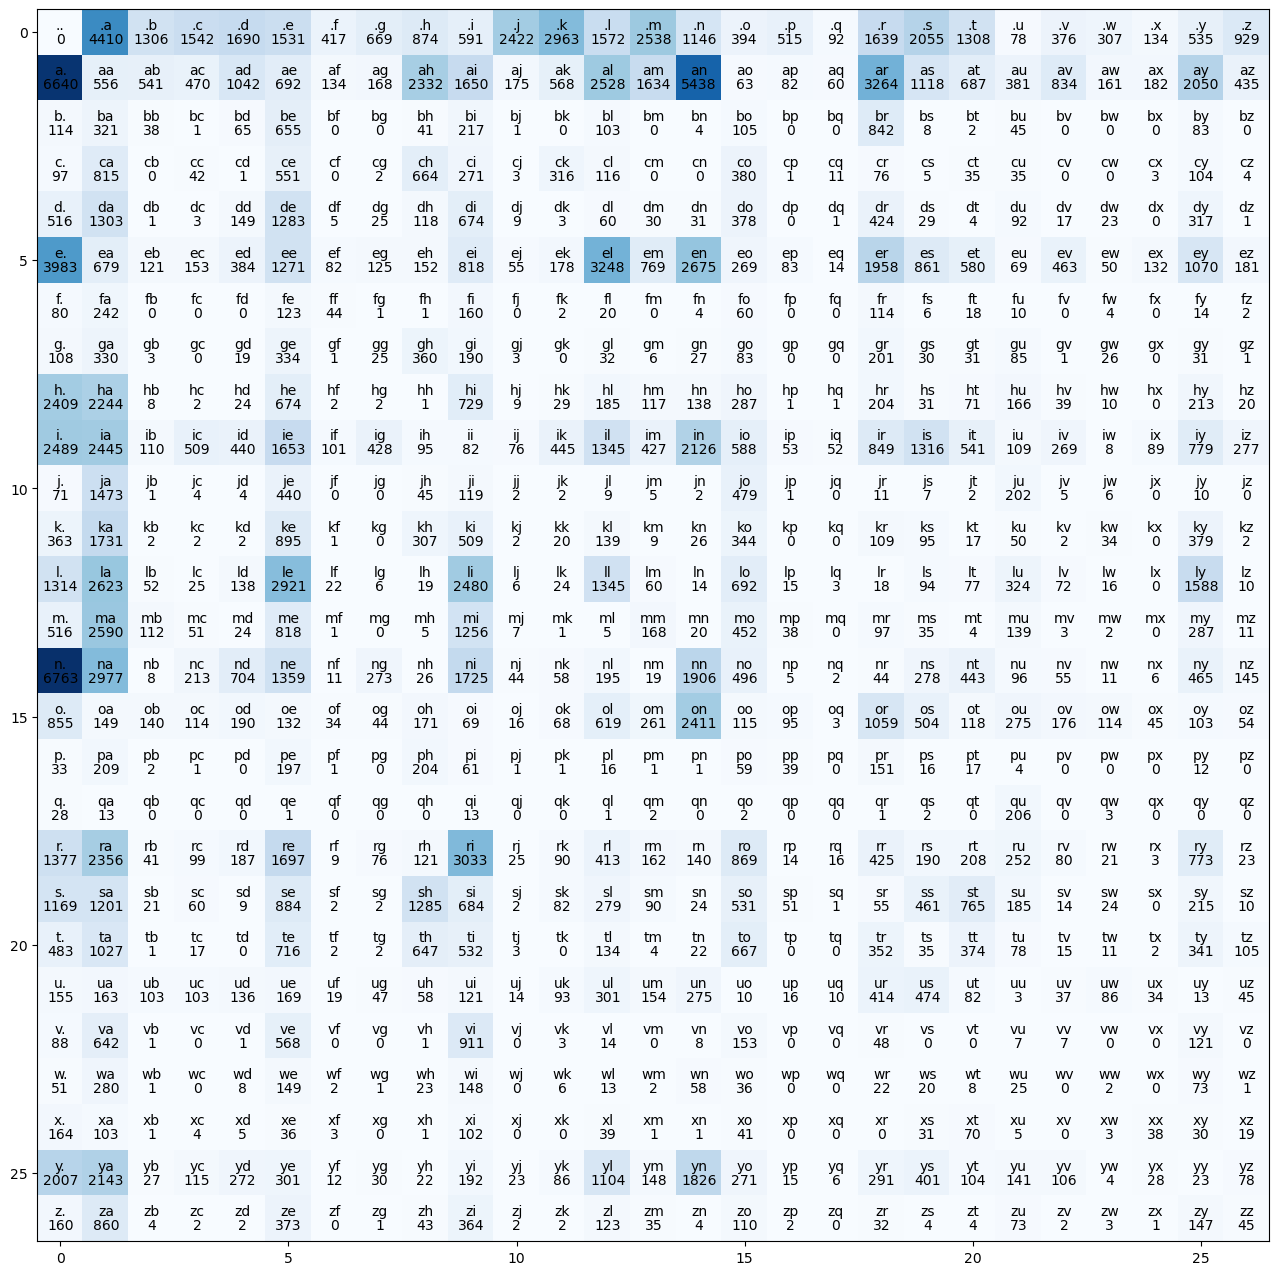

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = i_to_char[i] + i_to_char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="black")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="black")

In [18]:
P = N.float()
P /= P.sum(dim=1).unsqueeze(dim=1)

In [19]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = ''
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out+=i_to_char[ix]
        if ix==0:
            break
    print(out)

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


In [30]:
log_likelihood = 0.0
num_bigrams = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        num_bigrams += 1
        idx1 = char_to_i[c1]
        idx2 = char_to_i[c2]
        log_likelihood += torch.log(P[idx1, idx2])
print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"loss = {nll/num_bigrams}")

log_likelihood=tensor(-559891.7500)
nll=tensor(559891.7500)
loss = 2.454094171524048


In [31]:
x, y = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for c1, c2 in zip(chs, chs[1:]):
        idx1, idx2 = char_to_i[c1], char_to_i[c2]
        x.append(idx1)
        y.append(idx2)
        
x = torch.tensor(x)
y = torch.tensor(y)

x, y

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [33]:
import torch.nn.functional as F

x_enc = F.one_hot(x, 27)
y_enc = F.one_hot(y, 27)

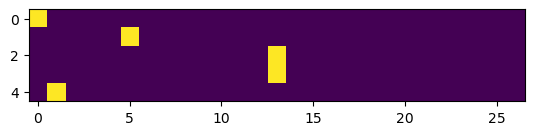

In [37]:
plt.imshow(x_enc)